# COCO to YOLO format

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os

In [4]:
# Pie
with open('dataset/reduce/piedata(1008)/pie/annotations/instancesPie(1008)_train2019.json', "r", encoding="utf-8") as f:
    pie_train = json.load(f)

with open('dataset/reduce/piedata(1008)/pie/annotations/instancesPie(1008)_val2019.json', "r", encoding="utf-8") as f:
    pie_val = json.load(f)

with open('dataset/reduce/piedata(1008)/pie/annotations/instancesPie(1008)_test2019.json', "r", encoding="utf-8") as f:
    pie_test = json.load(f)

# Bar
with open('dataset/reduce/bardata(1031)/bar/annotations/instancesBar(1031)_train2019.json', "r", encoding="utf-8") as f:
    bar_train = json.load(f)

with open('dataset/reduce/bardata(1031)/bar/annotations/instancesBar(1031)_val2019.json', "r", encoding="utf-8") as f:
    bar_val = json.load(f)

with open('dataset/reduce/bardata(1031)/bar/annotations/instancesBar(1031)_test2019.json', "r", encoding="utf-8") as f:
    bar_test = json.load(f)

In [5]:
pie_label_dir = "./dataset/reduce/piedata(1008)/pie/labels"
os.makedirs(pie_label_dir, exist_ok=True)

train_label_dir = os.path.join(pie_label_dir, "train2019")
val_label_dir = os.path.join(pie_label_dir, "val2019")
test_label_dir = os.path.join(pie_label_dir, "test2019")
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

## Pie chart

Image ID: 75000
File Name: fa266c2d49db01fdb7ce6ea711764300_d3d3Lmdvdi5zY290CTEzNC4xOS4xNjEuMjQ5-37-0.png
Box 1: [202.0, 37.0, 126.0, 96.0, 202.0, 115.0]
Box 2: [126.0, 96.0, 202.0, 37.0, 202.0, 115.0]


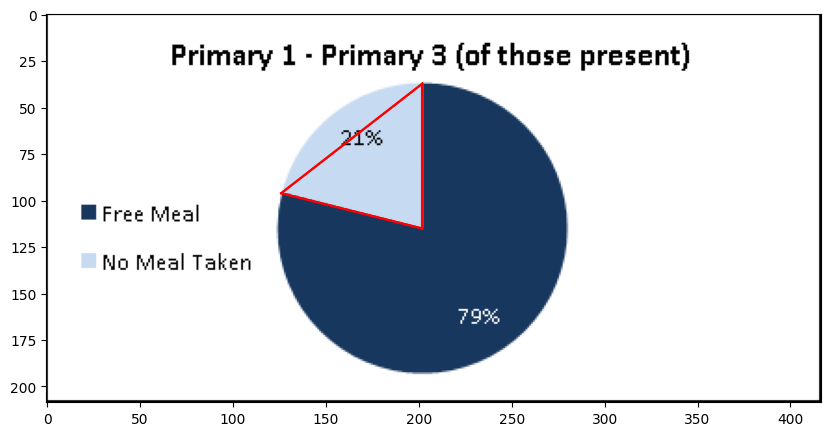

In [6]:
first_image = pie_val['images'][1]
idx = first_image['id']
file_name = first_image['file_name']
bboxs = [ann for ann in pie_val['annotations'] if ann['image_id'] == idx]

print(f"Image ID: {idx}")
print(f"File Name: {file_name}")
for i, b in enumerate(bboxs):
    print(f"Box {i + 1}: {b['bbox']}")
    
plt.figure(figsize=(10, 10))
image = plt.imread(f'dataset/reduce/piedata(1008)/pie/images/val2019/{file_name}')

for bbox in bboxs:
    arc_1_x, arc_1_y, arc_2_x, arc_2_y, center_x, center_y = bbox['bbox']
    plt.plot([arc_1_x, arc_2_x], [arc_1_y, arc_2_y], 'r')
    plt.plot([arc_2_x, center_x], [arc_2_y, center_y], 'r')
    plt.plot([center_x, arc_1_x], [center_y, arc_1_y], 'r')
    
plt.imshow(image)

### Reduce folder

In [7]:
def create_pie_label_file(annotation_path, label_dir):
    with open(annotation_path, "r") as f:
        data = json.load(f)
    
    for img in data["images"]:
        img_id = img["id"]
        img_width, im_height = img["width"], img["height"]
        img_name = img["file_name"]
        
        label_path = os.path.join(label_dir, f"{os.path.splitext(img_name)[0]}.txt")
        
        with open(label_path, 'w') as f:
            for annotation in data["annotations"]:
                if annotation["image_id"] == img_id:
                    category_id = annotation["category_id"]
                    x1, y1, x2, y2, xc, yc = annotation["bbox"]
                    
                    x1 = x1 / img_width
                    y1 = y1 / im_height
                    x2 = x2 / img_width
                    y2 = y2 / im_height
                    xc = xc / img_width
                    yc = yc / im_height
                    
                    f.write(f"{category_id} {x1} {y1} {x2} {y2} {xc} {yc}\n")

In [8]:
reduce_annotation_pie_train = "./dataset/reduce/piedata(1008)/pie/annotations/instancesPie(1008)_train2019.json"
reduce_annotation_pie_val = "./dataset/reduce/piedata(1008)/pie/annotations/instancesPie(1008)_val2019.json"
reduce_annotation_pie_test = "./dataset/reduce/piedata(1008)/pie/annotations/instancesPie(1008)_test2019.json"

reduce_annotation_pieR_train = "./dataset/reduce/piedata(1008)/pie/annotations/instancesPieR(1008)_test2019.json"
reduce_annotation_pieR_val = "./dataset/reduce/piedata(1008)/pie/annotations/instancesPieR(1008)_val2019.json"
reduce_annotation_pieR_test = "./dataset/reduce/piedata(1008)/pie/annotations/instancesPieR(1008)_test2019.json"

In [9]:
reduce_pie_label_dir = "./dataset/reduce/piedata(1008)/pie/labels"
os.makedirs(reduce_pie_label_dir, exist_ok=True)

reduce_train_label_dir = os.path.join(reduce_pie_label_dir, "train2019")
reduce_val_label_dir = os.path.join(reduce_pie_label_dir, "val2019")
reduce_test_label_dir = os.path.join(reduce_pie_label_dir, "test2019")
os.makedirs(reduce_train_label_dir, exist_ok=True)
os.makedirs(reduce_val_label_dir, exist_ok=True)
os.makedirs(reduce_test_label_dir, exist_ok=True)

In [10]:
create_pie_label_file(reduce_annotation_pie_train, reduce_train_label_dir)
create_pie_label_file(reduce_annotation_pie_val, reduce_val_label_dir)
create_pie_label_file(reduce_annotation_pie_test, reduce_test_label_dir)

### Test folder

In [11]:
test_annotation_pie_train = "./dataset/test/piedata(1008)/pie/annotations/instancesPie(1008)_train2019.json"
test_annotation_pie_val = "./dataset/test/piedata(1008)/pie/annotations/instancesPie(1008)_val2019.json"
test_annotation_pie_test = "./dataset/test/piedata(1008)/pie/annotations/instancesPie(1008)_test2019.json"

test_annotation_pieR_train = "./dataset/test/piedata(1008)/pie/annotations/instancesPieR(1008)_test2019.json"
test_annotation_pieR_val = "./dataset/test/piedata(1008)/pie/annotations/instancesPieR(1008)_val2019.json"
test_annotation_pieR_test = "./dataset/test/piedata(1008)/pie/annotations/instancesPieR(1008)_test2019.json"

In [12]:
test_pie_label_dir = "./dataset/test/piedata(1008)/pie/labels"
os.makedirs(test_pie_label_dir, exist_ok=True)

test_train_label_dir = os.path.join(test_pie_label_dir, "train2019")
test_val_label_dir = os.path.join(test_pie_label_dir, "val2019")
test_test_label_dir = os.path.join(test_pie_label_dir, "test2019")
os.makedirs(test_train_label_dir, exist_ok=True)
os.makedirs(test_val_label_dir, exist_ok=True)
os.makedirs(test_test_label_dir, exist_ok=True)

In [13]:
create_pie_label_file(test_annotation_pie_train, test_train_label_dir)
create_pie_label_file(test_annotation_pie_val, test_val_label_dir)
create_pie_label_file(test_annotation_pie_test, test_test_label_dir)